
<div style="width:30%; margin: auto;">

# Immozila at your service

</div>


<div style="width:60%; margin: auto;">

![house](house.png)  

</div>
<div style="width:10%; margin: auto;">


![app](app.png)  
</div>

# Imports and Loading data

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import IFrame
from geopy.distance import great_circle
import plotly.express as px
import plotly.graph_objects as go
import semfunction as sf
# Get the current directory (analyses folder)
current_dir = os.getcwd()

# Navigate up one directory to reach the parent directory (which contains the data folder)
parent_dir = os.path.dirname(current_dir)

# Define the file paths relative to the parent directory using os.path.join
clean_huis_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_house.csv")
clean_apartement_te_koop_path = os.path.join(parent_dir, "data", "cleaned", "clean_app.csv")

house = pd.read_csv(clean_huis_te_koop_path, sep=",")
app = pd.read_csv(clean_apartement_te_koop_path, sep=",")



## Questions to answer

- How many observations and features do you have?
- What is the proportion of missing values per column?
- Which variables would you delete and why?
- What variables are most subject to outliers?
- How many qualitative and quantitative variables are there? How would you transform the qualitative values into numerical values?
- What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?
- How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?
- How are the number of properties distributed according to their surface?
- Which five variables do you consider the most important and why?
- What are the least/most expensive municipalities in Belgium/Wallonia/Flanders? (in terms of price per m², average price, and median price)

# Q1 How many observations and features do you have?

In [21]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px


# Define function to count non-null values in each column
def count_non_null_values(df):
    return df.notnull().sum()

# Get colors from px.colors.qualitative.swatches()
colors = px.colors.qualitative.swatches()

# Create figure with subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Number of Observations - Houses", 
                                                    "Number of Observations - Apartments", 
                                                    "Features and occurrences - Houses", 
                                                    "Features and occurrences - Apartments"))

# Plot 1: Number of observations for house dataset
fig.add_trace(go.Bar(x=['House'], y=[len(house)], marker=dict(color=px.colors.qualitative.Alphabet[13])), row=1, col=1)

# Plot 2: Number of observations for apartment dataset
fig.add_trace(go.Bar(x=['Apartment'], y=[len(app)], marker=dict(color=px.colors.qualitative.Pastel[8])), row=1, col=2)

# Plot 3: Number of non-null values for each feature in house dataset
count_house = count_non_null_values(house)
fig.add_trace(go.Bar(x=count_house.index, y=count_house.values, marker=dict(color=px.colors.qualitative.Alphabet[13])), row=2, col=1)

# Plot 4: Number of non-null values for each feature in apartment dataset
count_apartment = count_non_null_values(app)
fig.add_trace(go.Bar(x=count_apartment.index, y=count_apartment.values, marker=dict(color=px.colors.qualitative.Pastel[8])), row=2, col=2)

# Update layout
fig.update_layout(showlegend=False, title_text="Number of Observations and Features", title_x=0.5)

# Set the same y-axis range for Plot 1 and Plot 2
max_observation_value = max(len(house), len(app))
fig.update_yaxes(range=[0, max_observation_value], row=1, col=1)
fig.update_yaxes(range=[0, max_observation_value], row=1, col=2)
fig.update_yaxes(range=[0, max_observation_value], row=2, col=1)
fig.update_yaxes(range=[0, max_observation_value], row=2, col=2)
fig.update_xaxes(tickangle=45, row=2, col=1)
fig.update_xaxes(tickangle=45, row=2, col=2)


# Show plot
fig.show()

- For the `houses` we have 12397 observations and 25 features
- For the `apartments` we have 9468 observations and 24 features (as surface of good is always empty for apartments)


### Q2 What is the proportion of missing values per column?

In [22]:
def make_bar_perc_plotly(df, colors=None, title="Missing Values Proportion"):
    df_missing = pd.DataFrame()
    df_missing["not-missing"] = df.count()/len(df)*100
    df_missing["missing"] = df.isnull().sum()/len(df)*100

    fig = px.bar(df_missing, x=df_missing.index, y=df_missing.columns, title=title, color_discrete_map=colors)
    fig.show()

house_custom_colors = {"not-missing": px.colors.qualitative.Alphabet[13], "missing": px.colors.qualitative.T10[9]}
make_bar_perc_plotly(house, colors=house_custom_colors, title="Missing Values Proportion - House")

In [23]:
app_custom_colors = {"not-missing": px.colors.qualitative.Pastel[8], "missing": px.colors.qualitative.T10[9]}
make_bar_perc_plotly(app, colors=app_custom_colors, title="Missing Values Proportion - Apartment")

### Q3 Which variables would you delete and why?


| Variable to remove      | Reason |
| ----------- | ----------- |
| surface_of_good | for apartments as surface of good is always empty   |
| property_id | as all records have a unique property_id |
| property_type | as for house this is always house and for apartment this is always apartement |
| terrace | booleans 1/0, we can deduct from terrace surface |
| garden | booleans 1/0, we can deduct from garden surface |

### Q4 What variables are most subject to outliers?


# Q5 How many qualitative and quantitative variables are there? How would you transform the qualitative values into numerical values?


# Q6 What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?

`Anwser`: 

- The price exhibits a significant correlation with the living area and terrace area. (This correlations can be attributed to the logical influence of price on the living space of a house) 
- The price has no correlation with number of facades, surface of goods and number of rooms. 
- The reason price and living area are better correlated is because if the house is bigger the price goes up. 
- It also important to note in which state the house is.


989


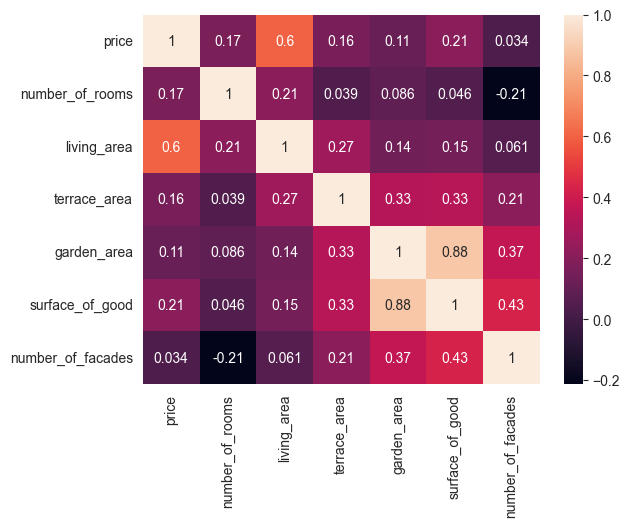

In [24]:
ndf = sf.filter_cities(house, "gent", "brussel", "brugge", "leuven", "antwerpen", "mechelen", "luik", "hasselt", "kortrijk", "doornik", "charleroi", "namen", "ieper", "roeselare")
fdf = ndf[["price", "number_of_rooms", "living_area", "terrace_area", "garden_area", "surface_of_good", "number_of_facades"]]
print(fdf.shape[0])
sf.heatmap(fdf)

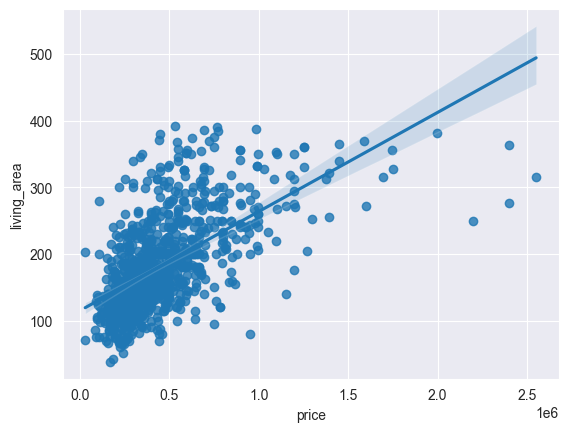

In [25]:
sf.regplot(fdf, "price", "living_area")

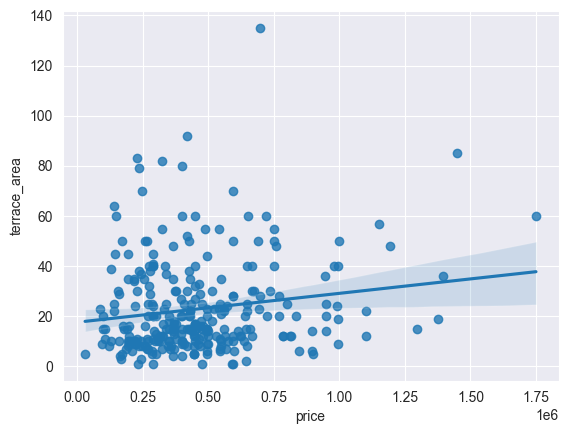

In [26]:
sf.regplot(fdf, "price", "terrace_area")

# Q7 How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?

`Anwser`: 
- There exist correlations beyond just price, notably in the linear relationships between living area and terrace space and garden area and the overall land size(surface area). 
- As the living area within a house expands, so does the corresponding terrace area. 
- The garden area also expands.


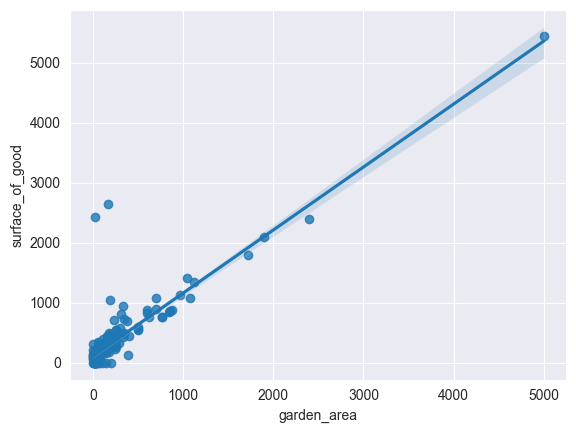

In [27]:
sf.regplot(fdf, "garden_area", "surface_of_good")

# Q8 How are the number of properties distributed according to their surface?


`Anwser`: The distribution of the living area of apartments is right-skewed. This is an expected effect of the standards implemented to the housing in Belgium: the lower treshold for the apartment area is 18 m² (24 m² for the properties that were built after 2008), at the same time, there is no upper treshold for the living area, meaning that the extremely large apartments, e.g. penthouses will be present on the market. The most common size of an apartment for sale is around 100 m².

Text(0.5, 0, 'Living area, m$^2$')

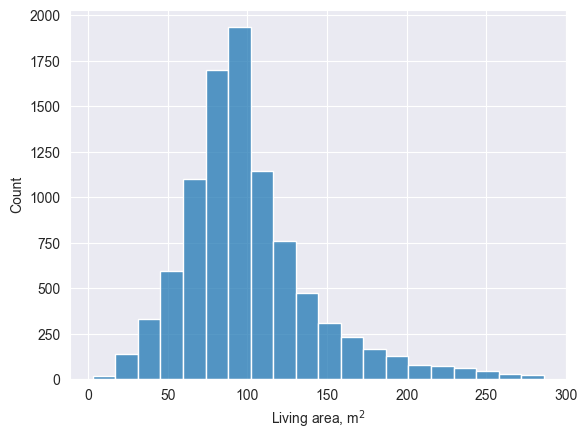

In [28]:
sns.set_style("darkgrid")
sns.histplot(app, x="living_area", bins=20)
plt.xlabel("Living area, m$^2$")


As for houses, we can observe similar right skew, which is, again, determined by local size regulations for very small houses. Houses are usually larger than apartments: the living area of the majority of house-type properties on the market today reached the size of around 150 m².

Text(0.5, 0, 'Living area, m$^2$')

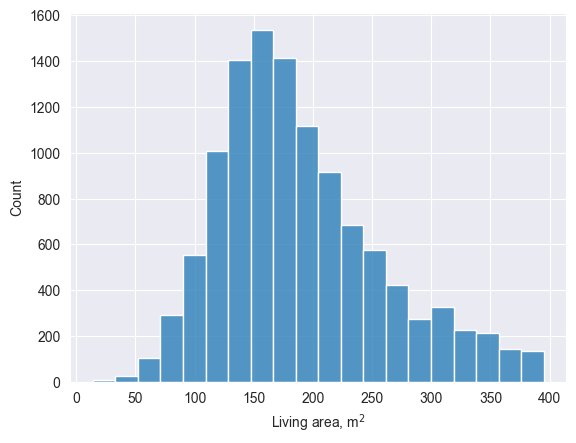

In [29]:
sns.set_style("darkgrid")
sns.histplot(house, x="living_area", bins=20)
plt.xlabel("Living area, m$^2$")

# Q9 Which five variables do you consider the most important and why?


# Q10 What are the least/most expensive municipalities in Belgium/Wallonia/Flanders? (in terms of price per m², average price, and median price)

`Anwser`: The residences commanding higher market values predominantly gravitate towards prominent urban centers in Belgium. Notably, Brussels, Antwerp, Knokke, and Luik exhibit an elevated average pricing paradigm for residential properties. Conversely, more economical housing options are inclined to be positioned predominantly in the southern regions of Belgium, specifically within the Wallonian territory.

In [30]:
def aggregate_function(df):
    
    grouped = df.groupby('province').agg(
    mean_price=pd.NamedAgg(column='price', aggfunc='mean'),
    median_price=pd.NamedAgg(column='price', aggfunc='median'),
    max_price=pd.NamedAgg(column='price', aggfunc='max'),
    min_price=pd.NamedAgg(column='price', aggfunc='min'),

    mean_price_m2=pd.NamedAgg(column='price_per_m2', aggfunc='mean'),
    median_price_m2=pd.NamedAgg(column='price_per_m2', aggfunc='median'),
    max_price_m2=pd.NamedAgg(column='price_per_m2', aggfunc='max'),
    min_price_m2=pd.NamedAgg(column='price_per_m2', aggfunc='min'),

    lat=pd.NamedAgg(column='latitude', aggfunc='mean'),
    long = pd.NamedAgg(column='longitude', aggfunc='mean')
    

    ).reset_index()
    return grouped
house["price_per_m2"] = house["price"]/house["living_area"]
house_grouped = aggregate_function(house)

In [31]:
def make_map(df):
    # Define a custom marker icon

    map_center  = [df["lat"].mean(), df["long"].mean()]

    # Create the map
    my_map = folium.Map(location=map_center, zoom_start=8)

    for index, row in house_grouped.iterrows():
        Provincie, mean_price, median_price, max_price, min_price, mean_price_m2, median_price_m2, max_price_m2, min_price_m2, lat, long = row
        location_coordinates = [lat, long]
        popup = f"Province: {Provincie}\nMean Price: {round(mean_price,2)} EUR"
        custom_icon = folium.Icon(icon='home', prefix='fa')
        folium.Marker(location_coordinates, 
                    tooltip=popup,
                    icon= custom_icon).add_to(my_map)
        folium.CircleMarker(
            location=location_coordinates,
            radius=mean_price / 100000,  # Adjust the scaling factor as needed
            color='red',
            fill=True,
            fill_color='red'
        ).add_to(my_map)
    # Display the new map
    return my_map


In [32]:
make_map(house_grouped)

In [33]:
def aggregate_locality(df):
    
    grouped = df.groupby(['locality_name','province']).agg(
    mean_price=pd.NamedAgg(column='price', aggfunc='mean'),
    median_price=pd.NamedAgg(column='price', aggfunc='median'),

    mean_price_m2=pd.NamedAgg(column='price_per_m2', aggfunc='mean'),
    median_price_m2=pd.NamedAgg(column='price_per_m2', aggfunc='median'),

    latitude=pd.NamedAgg(column='latitude', aggfunc='mean'),
    longitude =pd.NamedAgg(column='longitude', aggfunc='mean')
    
    ).reset_index()
    return grouped

In [34]:
# grouped_locality = aggregate_locality(house)

# Filtered out the highest price observations
grouped_locality = aggregate_locality(house[house["price"]<= 2000000])

In [35]:
def make_heatmap(df, column,radius=2,key="all"):
    
    customdata=df[['locality_name', column,'province']]
    hover_template=('<b>Locality:</b> %{customdata[0]}<br>'
                '<b>Province:</b> %{customdata[2]}<br>'
                '<b>Price:</b> €%{customdata[1]:,.0f}<br>')
    fig = go.Figure(go.Densitymapbox(
        lat=df['latitude'],
        lon=df['longitude'],
        z=df[column],
        customdata=customdata,
        hovertemplate=hover_template,
        radius=radius,

    ))

    fig.update_layout(
        mapbox=dict(
            style="open-street-map",
            center=dict(lat=df['latitude'].mean(), lon=df['longitude'].mean()),
            zoom=6,
        ),
    )

    # Show the plot
    fig.show()

### Heatmap showing distribution of Average Price per Municipality

In [36]:
make_heatmap(grouped_locality, "mean_price",radius=10)

### Heatmap showing distribution of Median Price per Municipality

In [37]:
make_heatmap(grouped_locality, "median_price",radius=10)

### Heatmap showing distribution of Average Price per m2 per Municipality

In [38]:
make_heatmap(grouped_locality, "mean_price_m2",radius=10)